We're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement.

Goal:
To find out the two best markets to advertise our product in.

# Understanding the Data

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository.

Below, we'll do a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file stored in the clean-data folder of the repository we just mentioned. We'll read in the file using the direct link here.

In [2]:
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'

survey_data = pd.read_csv(direct_link, low_memory=0)

In [3]:
survey_data.info()
pd.options.display.max_columns = 150 # to avoid truncated output
survey_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

For better understanding of the survey, the following were the questions asked/ is the data dictionary:


| Questions                                                                                                                                                                                                                  | Columns (Field/Options)                                                                                                                                                                                                                                                                                                                                                  |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| How old are you?                                                                                                                                                                                                           | `Age`                                                                                                                                                                                                                                                                                                                                                                    |
| Have you attended a full time coding bootcamp?                                                                                                                                                                             | `AttendedBootcamp`                                                                                                                                                                                                                                                                                                                                                       |
| Have you finished [your coding bootcamp]?                                                                                                                                                                                  | `BootcampFinish`                                                                                                                                                                                                                                                                                                                                                         |
| Did you take out a loan to pay for the bootcamp?                                                                                                                                                                           | `BootcampLoanYesNo`                                                                                                                                                                                                                                                                                                                                                      |
| Which [coding bootcamp]?                                                                                                                                                                                                   | `BootcampName`                                                                                                                                                                                                                                                                                                                                                           |
| Based on your experience, would you recommend this bootcamp to your friends?                                                                                                                                               | `BootcampRecommend`                                                                                                                                                                                                                                                                                                                                                      |
| How many children do you have?                                                                                                                                                                                             | `ChildrenNumber`                                                                                                                                                                                                                                                                                                                                                         |
| About how many people live in your city?                                                                                                                                                                                   | `CityPopulation`                                                                                                                                                                                                                                                                                                                                                         |
| If you have attended in-person-related events before, which ones have you found helpful?                                                                                                                                   | `CodeEventConferences`, `CodeEventDjangoGirls`, `CodeEventFCC`, `CodeEventGameJam`, `CodeEventGirlDev`, `CodeEventHackathons`, `CodeEventMeetup`, `CodeEventNodeSchool`, `CodeEventNone`, `CodeEventOther`, `CodeEventRailsBridge`, `CodeEventRailsGirls`, `CodeEventStartUpWknd`, `CodeEventWkdBootcamps`, `CodeEventWomenCode`, `CodeEventWorkshops`                   |
| About how many minutes does it take you to get to work each day                                                                                                                                                            | `CommuteTime`                                                                                                                                                                                                                                                                                                                                                            |
| Which country are you a citizen of?                                                                                                                                                                                        | `CountryCitizen`                                                                                                                                                                                                                                                                                                                                                         |
| Which country do you currently live in?                                                                                                                                                                                    | `CountryLive`                                                                                                                                                                                                                                                                                                                                                            |
| Which field do you work in?                                                                                                                                                                                                | `EmploymentField`                                                                                                                                                                                                                                                                                                                                                        |
| Which field do you work in? and answer was not given in list                                                                                                                                                               | `EmploymentFieldOther`                                                                                                                                                                                                                                                                                                                                                   |
| Regarding employment status, are you currently...                                                                                                                                                                          | `EmploymentStatus`                                                                                                                                                                                                                                                                                                                                                       |
| Regarding employment status, are you currently... (and answer was not given in list)                                                                                                                                       | `EmploymentStatusOther`                                                                                                                                                                                                                                                                                                                                                  |
| About how much money do you expect to earn per year at your first developer job, in US dollars?"                                                                                                                           | `ExpectedEarning`                                                                                                                                                                                                                                                                                                                                                        |
| Do you financially support any elderly relatives or relatives with disabilities?                                                                                                                                           | `FinanciallySupporting`                                                                                                                                                                                                                                                                                                                                                  |
| Is this your first software development job?                                                                                                                                                                               | `FirstDevJob`                                                                                                                                                                                                                                                                                                                                                            |
| What's your gender?                                                                                                                                                                                                        | `Gender`                                                                                                                                                                                                                                                                                                                                                                 |
| What's your gender? (and answer was not given in list)                                                                                                                                                                     | `GenderOther`                                                                                                                                                                                                                                                                                                                                                            |
| Do you have children?                                                                                                                                                                                                      | `HasChildren`                                                                                                                                                                                                                                                                                                                                                            |
| Do you have any debt?                                                                                                                                                                                                      | `HasDebt`                                                                                                                                                                                                                                                                                                                                                                |
| Do you financially support any dependents?                                                                                                                                                                                 | `HasFinancialDependents`                                                                                                                                                                                                                                                                                                                                                 |
| Do you have high speed internet at your home?                                                                                                                                                                              | `HasHighSpdInternet`                                                                                                                                                                                                                                                                                                                                                     |
| Do you have a home mortgage?                                                                                                                                                                                               | `HasHomeMortgage`                                                                                                                                                                                                                                                                                                                                                        |
| Have you served in your country's military before?                                                                                                                                                                         | `HasServedInMilitary`                                                                                                                                                                                                                                                                                                                                                    |
| Do you have student loan debt?                                                                                                                                                                                             | `HasStudentDebt`                                                                                                                                                                                                                                                                                                                                                         |
| About how much do you owe on your home mortgage, in US dollars?                                                                                                                                                            | `HomeMortgageOwe`                                                                                                                                                                                                                                                                                                                                                        |
| About how many hours do you spend learning each week?                                                                                                                                                                      | `HoursLearning`                                                                                                                                                                                                                                                                                                                                                          |
| Unique identifier from the first part of the survey                                                                                                                                                                        | `ID.x`                                                                                                                                                                                                                                                                                                                                                                   |
| Unique identifier from the second part of the survey                                                                                                                                                                       | `ID.y`                                                                                                                                                                                                                                                                                                                                                                   |
| About how much money did you make last year, in US dollars?                                                                                                                                                                | `Income`                                                                                                                                                                                                                                                                                                                                                                 |
| Are you an ethnic minority in your country?                                                                                                                                                                                | `IsEthnicMinority`                                                                                                                                                                                                                                                                                                                                                       |
| Do you receive disability benefits from your government?                                                                                                                                                                   | `IsReceiveDisabilitiesBenefits`                                                                                                                                                                                                                                                                                                                                          |
| Are you already working as a software developer?                                                                                                                                                                           | `IsSoftwareDev`                                                                                                                                                                                                                                                                                                                                                          |
| Do you consider yourself under employed?                                                                                                                                                                                   | `IsUnderEmployed`                                                                                                                                                                                                                                                                                                                                                        |
| When do you plan to start applying for developer jobs?                                                                                                                                                                     | `JobApplyWhen`                                                                                                                                                                                                                                                                                                                                                           |
| Which one of these careers are your interested in?                                                                                                                                                                         | `JobInterestBackEnd`, `JobInterestDataEngr`, `JobInterestDataSci`, `JobInterestDevOps`, `JobInterestFrontEnd`, `JobInterestFullStack`, `JobInterestGameDev`, `JobInterestInfoSec`, `JobInterestMobile`, `JobInterestOther`, `JobInterestProjMngr`, `JobInterestQAEngr`, `JobInterestUX`                                                                                  |
| Would you prefer to...                                                                                                                                                                                                     | `JobPref`                                                                                                                                                                                                                                                                                                                                                                |
| Are you willing to relocate for a job?                                                                                                                                                                                     | `JobRelocateYesNo`                                                                                                                                                                                                                                                                                                                                                       |
| Which one of these careers are you interested in?(and this is a string of the multiple answers possibly given. This string comes from the second dataset. This column was kept in order to double check the other columns) | `JobRoleInterest`                                                                                                                                                                                                                                                                                                                                                        |
| Would you prefer to...(and answers range from working at home to having no preference)                                                                                                                                     | `JobWherePref`                                                                                                                                                                                                                                                                                                                                                           |
| Which language do you speak at home with your family?                                                                                                                                                                      | `LanguageAtHome`                                                                                                                                                                                                                                                                                                                                                         |
| What's your marital status?                                                                                                                                                                                                | `MaritalStatus`                                                                                                                                                                                                                                                                                                                                                          |
| Aside from university tuition, about how much money have you spent on learning to code so far, in US dollars?                                                                                                              | `MoneyForLearning`                                                                                                                                                                                                                                                                                                                                                       |
| About how many months have you been programming for?                                                                                                                                                                       | `MonthsProgramming`                                                                                                                                                                                                                                                                                                                                                      |
| Unique ID for the network the survey was completed on                                                                                                                                                                      | `NetworkID`                                                                                                                                                                                                                                                                                                                                                              |
| The date time for when the first part of the survey ended                                                                                                                                                                  | `Part1EndTime`                                                                                                                                                                                                                                                                                                                                                           |
| The date time for when the first part of the survey was started                                                                                                                                                            | `Part1StartTime`                                                                                                                                                                                                                                                                                                                                                         |
| The date time for when the second part of the survey ended                                                                                                                                                                 | `Part2EndTime`                                                                                                                                                                                                                                                                                                                                                           |
| The date time for when the second part of the survey was started                                                                                                                                                           | `Part2StartTime`                                                                                                                                                                                                                                                                                                                                                         |
| If you have listened to coding-related podcasts before, which ones have you found useful?                                                                                                                                  | `PodcastChangeLog` `PodcastCodeNewbie`, `PodcastCodePen`, `PodcastDevTea`, `PodcastDotNET`, `PodcastGiantRobots`, `PodcastJSAir`, `PodcastJSJabber`, `PodcastNone`, `PodcastOther`, `PodcastProgThrowdown`, `PodcastRubyRogues`, `PodcastSEDaily`, `PodcastSERadio`, `PodcastShopTalk`, `PodcastTalkPython`, `PodcastTheWebAhea`                                         |
| Which online learning resources have you found helpful?                                                                                                                                                                    | `ResourceCodecademy`, `ResourceCodeWars`, `ResourceCoursera`, `ResourceCSS`, `ResourceEdX`, `ResourceEgghead`, `ResourceFCC`, `ResourceHackerRank`, `ResourceKA`, `ResourceLynda`, `ResourceMDN`, `ResourceOdinProj`, `ResourceOther`, `ResourcePluralSight`, `ResourceSkillcrush`, `ResourceSO`, `ResourceTreehouse`, `ResourceUdacity`, `ResourceUdemy`, `ResourceW3S` |
| What's the highest degree or level of school you have completed?                                                                                                                                                           | `SchoolDegree`                                                                                                                                                                                                                                                                                                                                                           |
| What was the main subject you studied in university?                                                                                                                                                                       | `SchoolMajor`                                                                                                                                                                                                                                                                                                                                                            |
| About how much do you owe in student loans, in US dollars?                                                                                                                                                                 | `StudentDebtOwe`                                                                                                                                                                                                                                                                                                                                                         |
| If you have watched coding-related YouTube videos before, which channels have you found useful?                                                                                                                            | `YouTubeCodeCourse`, `YouTubeCodingTrain`, `YouTubeCodingTut360`, `YouTubeComputerphile`, `YouTubeDerekBanas`, `YouTubeDevTips`, `YouTubeEngineeredTruth`, `YouTubeFCC`, `YouTubeFunFunFunction`, `YouTubeGoogleDev`, `YouTubeLearnCode`, `YouTubeLevelUpTut`, `YouTubeMIT`, `YouTubeMozillaHacks`, `YouTubeOther`, `YouTubeSimplilearn`, `YouTubeTheNewBoston`          |

# Checking for Sample Representativity

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

First, we need to clarify whether the sample is representative for our population of interest and it has the right categories of people for our purpose.

## Sample data relevancy

The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working in. 
* If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [4]:
domains_involved_in_job_distribution = survey_data['JobRoleInterest'].value_counts(normalize=True)*100
domains_involved_in_job_distribution = domains_involved_in_job_distribution.to_frame()
domains_involved_in_job_distribution

,JobRoleInterest
Full-Stack Web Developer,11.770595
Front-End Web Developer,6.435927
Data Scientist,2.173913
Back-End Web Developer,2.030892
Mobile Developer,1.673341
...,...
"Product Manager, Data Engineer, Mobile Developer, Front-End Web Developer, Data Scientist, User Experience Designer",0.014302
"User Experience Designer, Front-End Web Developer, Game Developer, Mobile Developer",0.014302
Computer Architect,0.014302
"Front-End Web Developer, Full-Stack Web Developer, Back-End Web Developer, Product Manager, Mobile Developer",0.014302


It looks like:
* A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
* A few people are interested in mobile development.
* A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. 

## Number of interests

In [5]:
number_of_interested_domains = domains_involved_in_job_distribution.reset_index().rename(columns={'index':'Domains', 'JobRoleInterest':'People Interested(in %)'})
number_of_interested_domains['Number of Domains'] = number_of_interested_domains['Domains'].str.split(", ").str.len()
number_of_interested_domains['Interest in more than 1'] = number_of_interested_domains['Number of Domains'] > 1
number_of_interested_domains

,Domains,People Interested(in %),Number of Domains,Interest in more than 1
0,Full-Stack Web Developer,11.770595,1,False
1,Front-End Web Developer,6.435927,1,False
2,Data Scientist,2.173913,1,False
3,Back-End Web Developer,2.030892,1,False
4,Mobile Developer,1.673341,1,False
...,...,...,...,...
3208,"Product Manager, Data Engineer, Mobile Dev...",0.014302,6,True
3209,"User Experience Designer, Front-End Web De...",0.014302,4,True
3210,Computer Architect,0.014302,1,False
3211,"Front-End Web Developer, Full-Stack Web Deve...",0.014302,5,True


Survey respondents are interested in learning only 1 subject as well as learning more than 1 subject.

In [6]:
data = [
        number_of_interested_domains.loc[~number_of_interested_domains['Interest in more than 1'],'People Interested(in %)'].sum(),
        100 - number_of_interested_domains.loc[~number_of_interested_domains['Interest in more than 1'],'People Interested(in %)'].sum()
       ]

index = [
         'Interest in only 1 subject',
         'Interest in more than 1 subject'
        ]
sample_subject_interest_overview = pd.Series(data=data,index=index,name='number of CS areas interests')
sample_subject_interest_overview

Interest in only 1 subject         31.650458
Interest in more than 1 subject    68.349542
Name: number of CS areas interests, dtype: float64

Interest in learning more than 1 subject (approx. 68%) is clearly greater than the interest shown to learn only 1 subject (approx 32%). But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

## Respondents who are interested in the company's core offerings (courses in web development and/or mobile development)

In [7]:
num_people_interested_in_core_offerings = survey_data['JobRoleInterest'].str.contains('Web Developer|Mobile Developer').value_counts(normalize=True)*100
num_people_interested_in_core_offerings

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

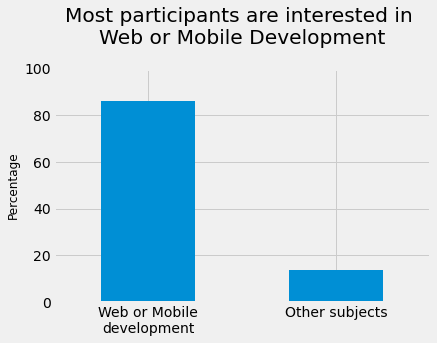

In [8]:
plt.style.use('fivethirtyeight')

num_people_interested_in_core_offerings.plot.bar()
plt.title('Most participants are interested in \nWeb or Mobile Development', y=1.08)
plt.xticks([0,1],['Web or Mobile\ndevelopment','Other subjects'],rotation=0)
plt.ylim([0,100])
plt.ylabel('Percentage', fontsize=12)
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest.
* We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development - which is our population of interest

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:
* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

# New Coders - Locations and Densities

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (which may be different than the origin country). 
* For our analysis, we'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.
* Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [9]:
representative_survey_data = survey_data.dropna(subset=['JobRoleInterest'])
representative_survey_data

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,

In [10]:
abs_freq = representative_survey_data['CountryLive'].value_counts()
rel_freq = representative_survey_data['CountryLive'].value_counts(normalize=True)*100

In [11]:
potential_customers_by_market_freq_table = pd.DataFrame({
                                                          'Absolute Frequencies' : abs_freq,
                                                          'Percentages' : rel_freq
                                                        })
potential_customers_by_market_freq_table

,Absolute Frequencies,Percentages
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Guatemala,1,0.014624
Anguilla,1,0.014624
Jordan,1,0.014624
Sudan,1,0.014624


45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

# Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey.
* Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:
* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [12]:
prospective_markets = ['United States of America','United Kingdom','India','Canada']

In [13]:
# Replace 0s with 1s to avoid division by 0
adjusted_months_programming = representative_survey_data['MonthsProgramming'].replace(to_replace=0,value=1)
representative_survey_data['MoneySpentPerMonthLearning'] = representative_survey_data['MoneyForLearning']/adjusted_months_programming
representative_survey_data

<ipython-input-13-cdca6e9b686e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  representative_survey_data['MoneySpentPerMonthLearning'] = representative_survey_data['MoneyForLearning']/adjusted_months_programming


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonthLearning
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school

In [14]:
number_of_missing_values = representative_survey_data['MoneySpentPerMonthLearning'].isnull().sum()
number_of_missing_values

675

In [15]:
representative_survey_data.dropna(subset=['CountryLive','MoneySpentPerMonthLearning'], inplace=True)
representative_survey_data['MoneySpentPerMonthLearning'].isnull().sum()

<ipython-input-15-ca39f3d2ccab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  representative_survey_data.dropna(subset=['CountryLive','MoneySpentPerMonthLearning'], inplace=True)


0

## Initial Analysis

In [16]:
avg_money_spent_in_markets_of_interest = representative_survey_data.groupby('CountryLive')['MoneySpentPerMonthLearning'].mean().loc[prospective_markets]
avg_money_spent_in_markets_of_interest

CountryLive
United States of America    227.997996
United Kingdom               45.534443
India                       135.100982
Canada                      113.510961
Name: MoneySpentPerMonthLearning, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.
* It might be that we don't have have enough representative data for the United Kingdom and Canada, 
* or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. 
* Or it might be that the results are correct.

# Dealing with Extreme Outliers

In [17]:
#isolating countries of interest
markets_string = '|'.join(prospective_markets)
prospective_markets_survey_data = representative_survey_data.loc[representative_survey_data['CountryLive'].str.contains(markets_string)]
prospective_markets_survey_data

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonthLearning
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school

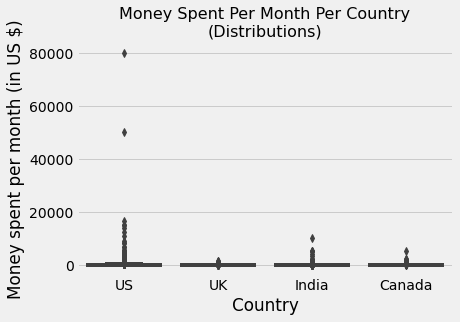

In [18]:
sns.boxplot(x='CountryLive', y='MoneySpentPerMonthLearning', data=prospective_markets_survey_data)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money spent per month (in US $)')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning.
* This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over $20,000 per month.

## Removing visible extreme outliers for US

In [19]:
prospective_markets_survey_data = prospective_markets_survey_data.loc[prospective_markets_survey_data['MoneySpentPerMonthLearning'] <= 20000]
print("Number of visible extreme outliers :",(prospective_markets_survey_data['MoneySpentPerMonthLearning'] > 20000).sum())

Number of visible extreme outliers : 0


## Recomputing averages (for money spent per month learning) for countries of interest

In [20]:
avg_money_spent_in_markets_of_interest_update_1 = prospective_markets_survey_data.groupby('CountryLive')['MoneySpentPerMonthLearning'].mean()
avg_money_spent_in_markets_of_interest_update_1

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: MoneySpentPerMonthLearning, dtype: float64

The average money spent by respondents living in countries of Canada, India, and United Kingdom computed after removing visible extreme outliers remain the same. Hence, lets graph out the distributions again for the 4 countries to look for more extreme outliers.

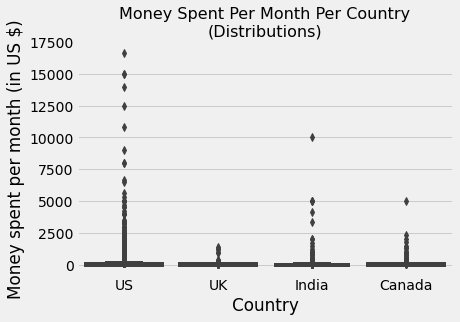

In [21]:
sns.boxplot(x='CountryLive', y='MoneySpentPerMonthLearning', data=prospective_markets_survey_data)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money spent per month (in US $)')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Lets isolate these data points to get a clearer picture.

## Isolating and scrutinizing Indian respondents who spent atypical amounts of money per month

In [22]:
indian_market_outliers = prospective_markets_survey_data.loc[(prospective_markets_survey_data['CountryLive'] == 'India') & (prospective_markets_survey_data['MoneySpentPerMonthLearning'] > 2500)]
indian_market_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonthLearning
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN

It seems that no participants attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning.

The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included.

Lets drop these rows.

## Removing Indian outliers

In [23]:
prospective_markets_survey_data.drop(index=indian_market_outliers.index, inplace=True)
print("Number of Indian outliers :",prospective_markets_survey_data.loc[(prospective_markets_survey_data['CountryLive'] == 'India') & (prospective_markets_survey_data['MoneySpentPerMonthLearning'] > 2500)].shape[0])

Number of Indian outliers : 0


C:\Users\Rohit\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Recomputing averages after removing Indian outliers

In [24]:
avg_money_spent_in_markets_of_interest_update_2 = prospective_markets_survey_data.groupby('CountryLive')['MoneySpentPerMonthLearning'].mean()
avg_money_spent_in_markets_of_interest_update_2

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    183.800110
Name: MoneySpentPerMonthLearning, dtype: float64

Though Indian data seems to be accounted for, UK data still seems suspect. Lets visualize the average monthly learning expenditures for the 4 countries again, to glean further atypical data points.

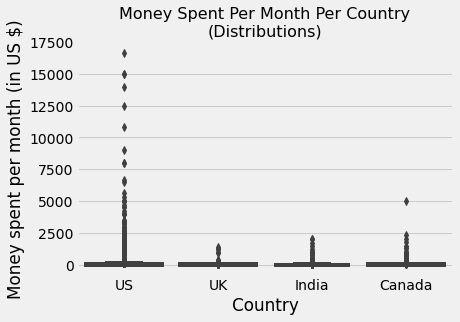

In [25]:
sns.boxplot(x='CountryLive', y='MoneySpentPerMonthLearning', data=prospective_markets_survey_data)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money spent per month (in US $)')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

Clearly, in relative terms, there are quite some respondents living in US who have spent over 6000$ monthly for programming courses. Lets sequester these oddities.

##  Isolating and scrutinizing US respondents who spent atypical amounts of money per month

In [26]:
us_market_outliers = prospective_markets_survey_data.loc[(prospective_markets_survey_data['CountryLive'] == 'United States of America') & (prospective_markets_survey_data['MoneySpentPerMonthLearning'] > 6000)]
us_market_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonthLearning
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,N

In [27]:
print("Respondents who paid huge amounts of money but did not attend any bootcamp :",(us_market_outliers['AttendedBootcamp'] == 0).sum())

Respondents who paid huge amounts of money but did not attend any bootcamp : 5


* Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. __Consequently, we'll remove those rows where participants reported thay they spend 6000$ each month, but they have never attended a bootcamp.__

In [28]:
us_market_outliers['MonthsProgramming'].describe()

count    11.000000
mean      3.090909
std       3.477198
min       0.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      12.000000
Name: MonthsProgramming, dtype: float64

In [29]:
us_market_outliers['MonthsProgramming'].value_counts().sort_index()

0.0     1
1.0     4
2.0     2
3.0     1
5.0     1
6.0     1
12.0    1
Name: MonthsProgramming, dtype: int64

* About half of the US respondents who are outliers in terms of spending, have programmed for lesser than 2 months at the time of survey completion. There is also 1 data point that indicates 3 months of programming done. Since about 5-6 months of programming seems long enough to justify high costs, those that are less than this duration of time can be deemed as outliers.
  - This might be because they paid for a bootcamp requiring a large sum of money to be paid upfront. Since amortization is done over a very small period of time, it is misleading.
    * Such payments cover for the next couple of months following the survey.
    
 __Consequently the 8 outliers would be removed.__

## Removing additional US outliers

In [30]:
us_market_extreme_outliers_indices = ((us_market_outliers['AttendedBootcamp'] == 0) | (us_market_outliers['MonthsProgramming'] < 5)).index
prospective_markets_survey_data.drop(index=us_market_extreme_outliers_indices, inplace=True)

C:\Users\Rohit\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Recomputing averages after removing additional US outliers

In [31]:
avg_money_spent_in_markets_of_interest_update_3 = prospective_markets_survey_data.groupby('CountryLive')['MoneySpentPerMonthLearning'].mean()
avg_money_spent_in_markets_of_interest_update_3

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneySpentPerMonthLearning, dtype: float64

Visualizing expenditures again

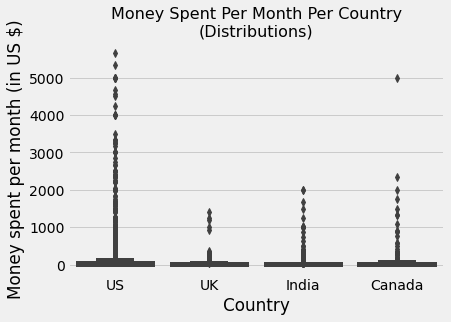

In [32]:
sns.boxplot(x='CountryLive', y='MoneySpentPerMonthLearning', data=prospective_markets_survey_data)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money spent per month (in US $)')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly \$5000 per month. Let's examine this person in more depth.

## Isolating and scrutinizing a Canadian respondent who spent atypical amounts of money per month

In [33]:
canadian_market_outliers = prospective_markets_survey_data.loc[(prospective_markets_survey_data['CountryLive'] == 'Canada') & (prospective_markets_survey_data['MoneySpentPerMonthLearning'] == 5000)]
canadian_market_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonthLearning
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

## Removing the sole Canadian outlier

In [34]:
prospective_markets_survey_data.drop(index=canadian_market_outliers.index,inplace=True)

C:\Users\Rohit\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Recomputing the averages after removing the only Canadian outlier

In [35]:
avg_money_spent_in_markets_of_interest_update_4 = prospective_markets_survey_data.groupby('CountryLive')['MoneySpentPerMonthLearning'].mean()
avg_money_spent_in_markets_of_interest_update_4

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneySpentPerMonthLearning, dtype: float64

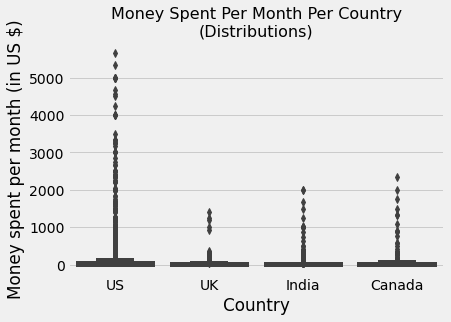

In [36]:
sns.boxplot(x='CountryLive', y='MoneySpentPerMonthLearning', data=prospective_markets_survey_data)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Money spent per month (in US $)')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

# Choosing the Two Best Markets

Two things should be kept in mind while choosing a market:-
1. Willingness to pay the monthly subscription amount (this is dictated by past avg. monthly spending patterns)
2. The potential customer base volume in the country

## Initial observations

* Obviously, one country we should __necessarily advertise__ in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

* The data also suggests strongly that we shouldn't advertise in the UK

* Based only on willingness to pay the monthtly subscription amount, Canada seems to be the best second choice because people there are willing to pay roughly 93 dollars per month, compared to India (66) and the United Kingdom (45). But, let's take a look at India to decide our second market to advertise in: 

## Deciding a second market

In [37]:
number_of_potential_customers = prospective_markets_survey_data['CountryLive'].value_counts()
number_of_potential_customers

United States of America    2920
India                        457
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

In [38]:
India_Canada_customer_difference = number_of_potential_customers['India']/number_of_potential_customers['Canada']
India_Canada_customer_difference

1.9121338912133892

1. 59 dollars doesn't seem to be expensive for indian customers as the average monthly expenditure on learning is about 66$. Hence purchasing power is not an issue
2. The number of potential customers in India close to 2 times it's Canadian counterpart.

While Canada might be a good option, India could make a stronger case for itself due to its superior customer size.

## Investment options

Hence, US, India and Canada are all good options for investing money for advertising our company's courses. 
* In terms of advertisement budget, the distribution should be proportional to the market attractiveness to maximize revenue. Hence the more budget should be allocated for US than India, and Canada should be given lesser focus compared to India.

Let's take a look at possible options for investment:-

Option 1 : Advertise only in the US. It has unparalled customer base and purchasing power.

Option 2 : Advertise in US and one of India or Canada. For instance :
* 70% for the US, and 30% for India.
* 65% for the US, and 35% for Canada; etc.

Option 3 : Advertise in all 3 countries.
* 60% for the US, 25% for India, 15% for Canada.
* 50% for the US, 30% for India, 20% for Canada; etc.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

# Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.